#Предыдущие результаты, которые понадобятся в этом ноутбуке

In [1]:
import numpy as np  

import seaborn as sns

In [2]:
np.random.seed(2)

Сгенерируем выборку

In [3]:
def linear_func(x):
    target_k = 2
    target_b = 9
    return target_k * x + target_b
    
def linear_func2(x):
    target_k = 5
    target_b = -2
    return target_k * x + target_b

In [4]:
xes = np.linspace(0, 1, 11)

print(xes)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [5]:
target_ys = np.array([linear_func(x) for x in xes])
print(target_ys)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]


In [6]:
noise = np.random.normal(0, 0.1, 11)
noisy_target_ys = target_ys + noise

print(noisy_target_ys)

[-2.04167578 -1.50562668 -1.21361961 -0.33597292 -0.17934356  0.41582526
  1.05028814  1.37547119  1.89420478  2.40909924  3.0551454 ]


================================================================================
# Начало скринкаста 3
================================================================================

#Метод наименьших квадратов

#Least squares method

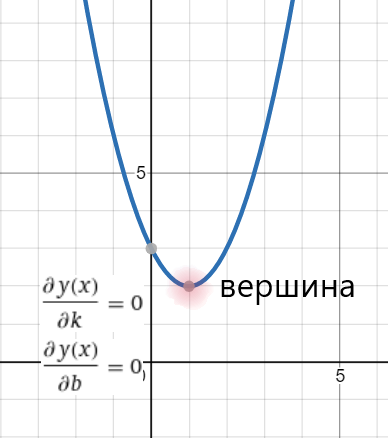

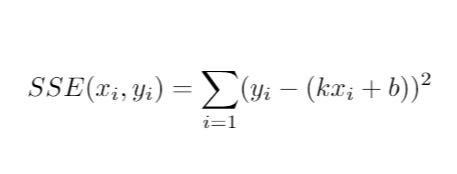

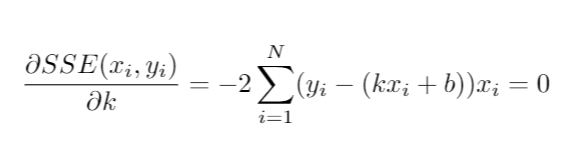

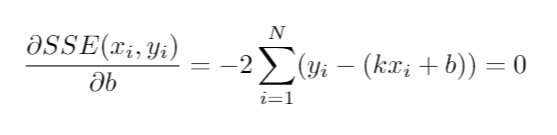

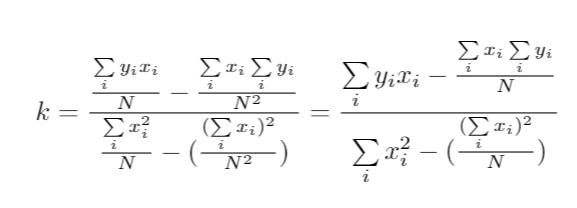

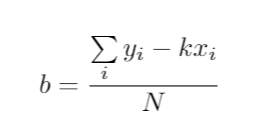

In [7]:
class OwnLinearRegressionLS:
    def __init__(self, k = 5, b = -2):
        self.k = k
        self.b = b

    def predict(self, X):
        return [x * self.k + self.b for x in X]

    def fit(self, X, Y):
        N = len(X)
        sumX = X.sum()
        sumY = Y.sum()
        sumXSquares = np.sum(X**2)
        sumXprodY = np.sum(X * Y)

        self.k = (sumXprodY - sumX * sumY / N) / \
        (sumXSquares - sumX * sumX / N)

        self.b = np.sum(Y - self.k*X) / N


In [12]:
lin_reg = OwnLinearRegressionLS(1, 1)

print("Predict = ",lin_reg.predict(np.array([5])))

lin_reg.fit(xes, noisy_target_ys)
print(lin_reg.k, lin_reg.b)
print("Predict = ",lin_reg.predict(np.array([5])))

Predict =  [6]
5.0108184286518584 -2.0577914449753685
Predict =  [22.996300698283925]


<AxesSubplot: >

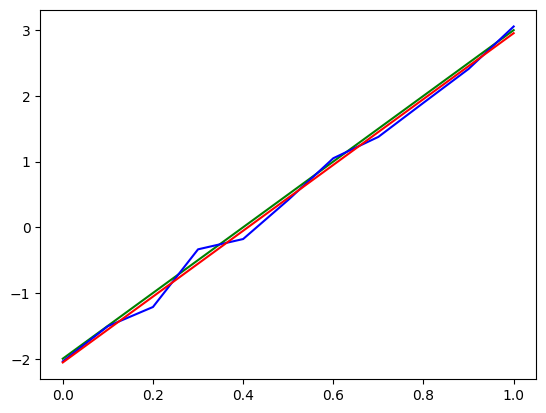

In [9]:
LSRegression_predict = [lin_reg.predict(np.array([x]))[0] for x in xes]
sns.lineplot(x = xes, y = target_ys, color = "g")
sns.lineplot(x = xes, y = noisy_target_ys, color = "b")
sns.lineplot(x = xes, y = LSRegression_predict, color = "r")

================================================================================
# Конец скринкаста 3
================================================================================